In [1]:
pip install jpype1

  Using cached JPype1-1.3.0-cp38-cp38-win_amd64.whl (362 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install jpype1==1.2.0

^C
Note: you may need to restart the kernel to use updated packages.


In [3]:
from konlpy.tag import Okt
okt = Okt()

In [5]:
test = "안녕, 나는 텍스트 마이닝 공부중이야."
print(okt.pos(test))

[('안녕', 'Noun'), (',', 'Punctuation'), ('나', 'Noun'), ('는', 'Josa'), ('텍스트', 'Noun'), ('마', 'Noun'), ('이닝', 'Noun'), ('공부', 'Noun'), ('중', 'Suffix'), ('이야', 'Josa'), ('.', 'Punctuation')]


In [6]:
from bs4 import BeautifulSoup
import urllib.request as req
import urllib.parse as par

keyword = "사회"  #'사회'라는 키워드를 임의로 설정
encoded = par.quote(keyword) # 한글 -> 특수한 문자

page_num = 1
output_total = ""  #변수 생성 : 총 본문 내용: 본문 내용을 한 곳에 저장해둠 
while True:
    url = "https://news.joins.com/Search/JoongangNews?page={}&Keyword={}&SortType=New&SearchCategoryType=JoongangNews".format(page_num, encoded)
    code = req.urlopen(url)   #html 불러오기
    soup = BeautifulSoup(code, "html.parser")   #html 보기 좋게 정리하기
    title = soup.select("h2.headline.mg > a")
    if len(title) == 0: # 끝 페이지까지 크롤링 완료했으면?
        break
    for i in title:
        print("제목 :", i.text)
        print("링크 :", i.attrs["href"])
        code_news = req.urlopen(i.attrs["href"])
        soup_news = BeautifulSoup(code_news, "html.parser")
        content = soup_news.select_one("div#article_body")
        result = content.text.strip().replace("     ", " ").replace("   ", "")
        print(result)  #본문 내용을 result에 저장
        print()
        output_total += result #빈 변수에 본문내용을 저장하여 하나의 문자열로 만들어 준다.
        

    page_num += 1
    if page_num == 2:
        break

제목 : CU 웃고 GS25 울었다…2분기 희비교차한 편의점 업계
링크 : https://news.joins.com/article/24122170
편의점 CU 브랜드 로고.  [사진 BGF리테일]    신종 코로나바이러스 감염증(코로나19)으로 소비가 위축되는 와중에도 곰표 맥주 등을 히트시킨 편의점 CU가 올해 2분기 호실적을 거뒀다. CU를 운영하는 BGF리테일은 2분기 매출액 1조7005억원에 영업이익 587억원을 기록했다고 5일 공시했다. 매출은 전년 동기보다 9.8% 늘었고, 영업이익도 31.9% 성장했다.   BGF리테일 관계자는 “코로나19로 어려운 상황임에도 점포 개선 프로그램 'Jump Up 프로젝트' 등 기존 점에 매출 성장동력을 불어넣는 영업전략이 가시적인 성과를 냈다”며 “이와 함께 업계 1위의 브랜드파워를 앞세워 신규점의 개점도 꾸준하게 증가하는 추세”라고 설명했다.     BGF리테일은 CU편의점에서 파는 간편식 상품을 업그레이드하거나 곰표 맥주 등 차별화 상품이 히트하고, 알뜰 프로모션을 전개하는 활동 등이 매출 증가를 이끄는 데 주효한 역할을 한 것으로 분석했다. 회사 관계자는 "전반적으로 사회적 거리두기로 인해 변화된 라이프스타일에 맞춰 근거리 쇼핑 수요를 잡기 위한 발 빠른 대응 전략이 실적 향상에 도움이 됐다”고 설명했다.   반면 GS리테일은 상대적으로 부진한 실적을 기록했다. GS25를 운영하는 GS리테일 2분기 매출은 2조2856억원으로 전년 동기보다 3.4% 늘었지만, 영업이익은 428억원으로 27.7% 감소했다.     GS리테일 관계자는 “지난 5월은 강수일수가 14.4일로 역대로 비가 가장 많이 내려 영업에 지장이 발생했고, 날씨 영향과 더불어 코로나19 상황 악화로 실적이 다소 부진했다”며 “하반기는 통합 GS리테일 출범에 따른 시너지 강화를 위해 노력하겠다”고 했다.관련기사심폐소생술로 고객 생명 살린 GS편의점 20대 알바생CU, "신선식품·생필품 무료배송"…마트·편의점 경계 허무나'곰표' 잡아라…세븐일레븐, 

In [11]:
print("형태소 분석 중입니다.")
from konlpy.tag import Okt
okt = Okt()

print("명사만 추출합니다.")
nouns = okt.nouns(output_total)  #nouns 명사를 리스트로 반환
print(nouns)

형태소 분석 중입니다.
명사만 추출합니다.
['편의점', '브랜드', '로고', '사진', '리테일', '신종', '코로나바이러스', '감염증', '코로나', '소비', '위축', '와중', '곰표', '맥주', '등', '히트', '편의점', '올해', '호실', '를', '운영', '리테일', '매출', '액', '영업', '이익', '기록', '공시', '매출', '년', '동기', '영업', '이익', '리테일', '관계자', '코로나', '로', '상황', '임', '점포', '개선', '프로그램', '프로젝트', '등', '기존', '점', '매출', '성장동력', '불어', '영업', '전략', '가시', '성과', '며', '이', '업계', '위', '브랜드', '파워', '신규', '점', '개점', '증가', '추세', '설명', '리테일', '편의점', '간편식', '상품', '업그레이드', '거나', '곰표', '맥주', '등', '차별', '상품', '히트', '알뜰', '프로모션', '전개', '활동', '등', '매출', '증가', '데', '주효', '역할', '것', '분석', '회사', '관계자', '전반', '사회', '거리', '두기', '변화', '라이프스타일', '근거리', '쇼핑', '수요', '잡기', '위', '발', '대응', '전략', '실적', '향상', '도움', '고', '설명', '반면', '리테일', '상대', '실적', '기록', '를', '운영', '리테일', '매출', '년', '동기', '영업', '이익', '감소', '리테일', '관계자', '지난', '강수일', '수가', '역대', '비', '가장', '영업', '지장', '발생', '날씨', '영향', '코로나', '상황', '악화', '실적', '다소', '며', '하반기', '통합', '리테일', '출범', '시너지', '강화', '위해', '노력', '고', '관련', '심폐소생술', '고객', '생명', '편의점', '알바생', '

In [12]:
# 단어 빈도수 count 하기

from collections import Counter
count = Counter(nouns)   
print(count)

## 불용어가 높은 빈도수를 차지 -> 불용어 제거가 필요

Counter({'수': 48, '교육': 48, '것': 43, '문제': 35, '암': 34, '사회': 33, '등': 32, '취향': 32, '중국': 28, '이': 27, '정부': 26, '명': 25, '발전': 23, '전쟁': 23, '삶': 23, '대학': 23, '그': 22, '지역': 22, '사람': 21, '말': 20, '소프트웨어': 20, '제': 19, '미래': 19, '중국군': 19, '특검': 19, '부문': 19, '학생': 19, '국민': 18, '고': 18, '지능': 18, '서울대': 18, '정책': 17, '공무원': 17, '인공': 17, '개': 16, '생존자': 16, '기업': 16, '교육과정': 16, '이후': 15, '위해': 14, '통해': 14, '국립': 14, '전략': 14, '수준': 14, '위': 14, '역': 14, '해결': 14, '전': 13, '환자': 13, '기술': 13, '군사': 13, '역량': 13, '사업': 13, '인문학': 13, '국가': 12, '센터': 12, '참여': 12, '를': 12, '교수': 12, '정보': 12, '인건비': 12, '수업': 12, '지식': 12, '건': 11, '더': 11, '경험': 11, '때': 11, '중': 11, '인재': 11, '의': 11, '세계': 11, '대한': 11, '팀': 11, '고교': 11, '강좌': 11, '지난': 10, '기자': 10, '통합': 10, '증가': 10, '프로그램': 10, '대화': 10, '영역': 10, '기능': 10, '육성': 10, '컨퍼런스': 10, '학년': 10, '전공': 10, '코로나': 9, '사건': 9, '시대': 9, '상황': 9, '지난해': 9, '지원': 9, '미국': 9, '핵심': 9, '인력': 9, '민간': 9, '최고': 9, '학점': 9, '혁신': 9, '학교': 9, 

#불용어 제거 - 에러 발생 코드

for i in count.keys(): 
    if len(i) == 1:
        del count[i]
      
      
RuntimeError: dictionary changed size during iteratio -> for 문에서 i로 불러오는 리스트에 변화가 생겨서 발생하는 에러 (*변화가 생기면 안됨!!) 


In [18]:
#불용어 제거

temp = count.copy() 
# 복사본 만들기
#-> 그냥 temp = count를 할 경우 리스트 자체를 대입한 것이기 때문에 count가 변경될 경우, temp도 변경되므로 copy 함수를 사용

for i in temp.keys(): #count변수의 key를 하나씩 가져옴 -> 단어 (keys:인덱스 이름만 가져옴)
    if len(i) == 1:  #문자의 길이가 1인 경우 불용어로 판단
        del count[i]
print(count)

Counter({'교육': 48, '문제': 35, '사회': 33, '취향': 32, '중국': 28, '정부': 26, '발전': 23, '전쟁': 23, '대학': 23, '지역': 22, '사람': 21, '소프트웨어': 20, '미래': 19, '중국군': 19, '특검': 19, '부문': 19, '학생': 19, '국민': 18, '지능': 18, '서울대': 18, '정책': 17, '공무원': 17, '인공': 17, '생존자': 16, '기업': 16, '교육과정': 16, '이후': 15, '위해': 14, '통해': 14, '국립': 14, '전략': 14, '수준': 14, '해결': 14, '환자': 13, '기술': 13, '군사': 13, '역량': 13, '사업': 13, '인문학': 13, '국가': 12, '센터': 12, '참여': 12, '교수': 12, '정보': 12, '인건비': 12, '수업': 12, '지식': 12, '경험': 11, '인재': 11, '세계': 11, '대한': 11, '고교': 11, '강좌': 11, '지난': 10, '기자': 10, '통합': 10, '증가': 10, '프로그램': 10, '대화': 10, '영역': 10, '기능': 10, '육성': 10, '컨퍼런스': 10, '학년': 10, '전공': 10, '코로나': 9, '사건': 9, '시대': 9, '상황': 9, '지난해': 9, '지원': 9, '미국': 9, '핵심': 9, '인력': 9, '민간': 9, '최고': 9, '학점': 9, '혁신': 9, '학교': 9, '문재인': 8, '병원': 8, '적용': 8, '활동': 8, '가장': 8, '단계': 8, '인식': 8, '글로벌': 8, '전체': 8, '우리': 8, '타인': 8, '일자리': 8, '방안': 8, '분야': 8, '집단': 7, '차원': 7, '마련': 7, '결과': 7, '유방암': 7, '다른': 7, '지지': 7, '사진':

In [22]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [42]:
from wordcloud import WordCloud
wordcloud = WordCloud(font_path = "./NanumMyeongjoBold.ttf", background_color = "white").generate_from_frequencies(count)
# font_path: 폰트 설정 - 현재 폴더에 폰트 파일 올리고 경로 넣어주기
# 워드 클라우드 모듈은 한글 폰트를 지원해주지 않으므로 설정이 필요!
# background_color: 배경 색상 설정

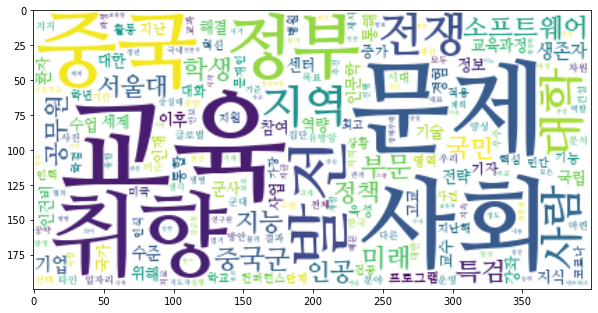

In [43]:
import matplotlib.pyplot as plt   #시각화 모듈
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation = "bilinear")  # 함수 안에 인수(wordcloud:워드클라우드 할 문자)를 넣어줘야함.
#interpolation = "bilinear": 글씨 테두리 정리
#wordcloud.recolor(image_color) #글자 색 이미지 색상에 맞게 재 설정

#plt.axis("off") 

##여기까지 그래프 창을 띄우기 위한 코드
plt.show()
#그래프 보여주기

In [40]:
## 이미지에 워드클라우드 시각화 하기

#이미지 가져오기
import numpy as np
from PIL import Image   #pip install pillow

image_list = np.array(Image.open("./KoreaMercadorAJHJ.jpg"))
#image_color = ImageColorGenerator(image_list)

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(font_path = "./NanumMyeongjoBold.ttf", background_color = "white",mask = image_list).generate_from_frequencies(count)
# font_path: 폰트 설정 - 현재 폴더에 폰트 파일 올리고 경로 넣어주기
# 워드 클라우드 모듈은 한글 폰트를 지원해주지 않으므로 설정이 필요!
# background_color: 배경 색상 설정
# mask = image_list 

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation = "bilinear")  # 함수 안에 인수(wordcloud:워드클라우드 할 문자)를 넣어줘야함.
#interpolation = "bilinear": 글씨 테두리 정리
#wordcloud.recolor(image_color) #글자 색 이미지 색상에 맞게 재 설정

#plt.axis("off") 

##여기까지 그래프 창을 띄우기 위한 코드
plt.show()
#그래프 보여주기